In [24]:
import json
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

In [25]:
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

In [26]:
def create_image_grid(images):
    # 创建一个图像网格
    grid_size = int(np.ceil(np.sqrt(len(images))))
    grid_img = Image.new('RGB', (images[0].width * grid_size, images[0].height * grid_size))
    for i, img in enumerate(images):
        grid_img.paste(img, ((i % grid_size) * img.width, (i // grid_size) * img.height))
    return grid_img

In [27]:
def process_index(all_files, all_angles, path_caption_data, path_data_pc, path_data_rgb, index=None):
    if index is None:
        index = np.random.randint(len(all_files))
        
    name = all_files[index]
    pc_np = np.load(os.path.join(path_data_pc, name + ".npy"))
    print("pc_np.shape: ")
    print(pc_np.shape)
    
    data = {'pointcloud_np': pc_np}
    
    captions_data = load_json(os.path.join(path_caption_data, name + ".json"))
    
    caption_missing = 0
    
    RGB_imgs = []
    for i, angle in enumerate(all_angles):
        img_name = name + f"_r_{angle:03d}.png"
        
        img_path = os.path.join(path_data_rgb, img_name)
        
        if img_name in captions_data:
            captions_rgb = captions_data[img_name]
        else:
            captions_rgb = [""] * 10  # 如果找不到对应的描述，使用空描述
            caption_missing += 1
            
        img_a = Image.open(img_path)
        
        RGB_imgs.append(img_a)
        
        data[f'angle_{i+1}'] = {
            'angle': angle,
            'image': img_a,
            'captions': captions_rgb,
        }
    
    if caption_missing > 0:
        print("!!!" + str(caption_missing) + " captions are missing!!!")
    
    RGB_imgs_show = create_image_grid(RGB_imgs)
        
    return data, RGB_imgs_show

In [28]:
dataset_path = "/mnt/disk2/iLori/ShapeNet-55-ULIP-2-triplets/"
path_caption_data = os.path.join(dataset_path, 'captions')
path_data_pc = os.path.join(dataset_path, "shapenet_pc")
path_data_rgb = os.path.join(dataset_path, "only_rgb_depth_images")

In [29]:
all_angles = np.arange(0, 360, 12)
print(len(all_angles))

30


In [30]:
keyword = "plane"

In [31]:
json_file = os.path.join(dataset_path, "filter_by_keyword", keyword + ".json")
plane_list = load_json(json_file)
print(len(plane_list))

2860


In [35]:
data, RGB_imgs_show = process_index(plane_list, all_angles, path_caption_data, path_data_pc, path_data_rgb)


pc_np.shape: 
(8192, 3)


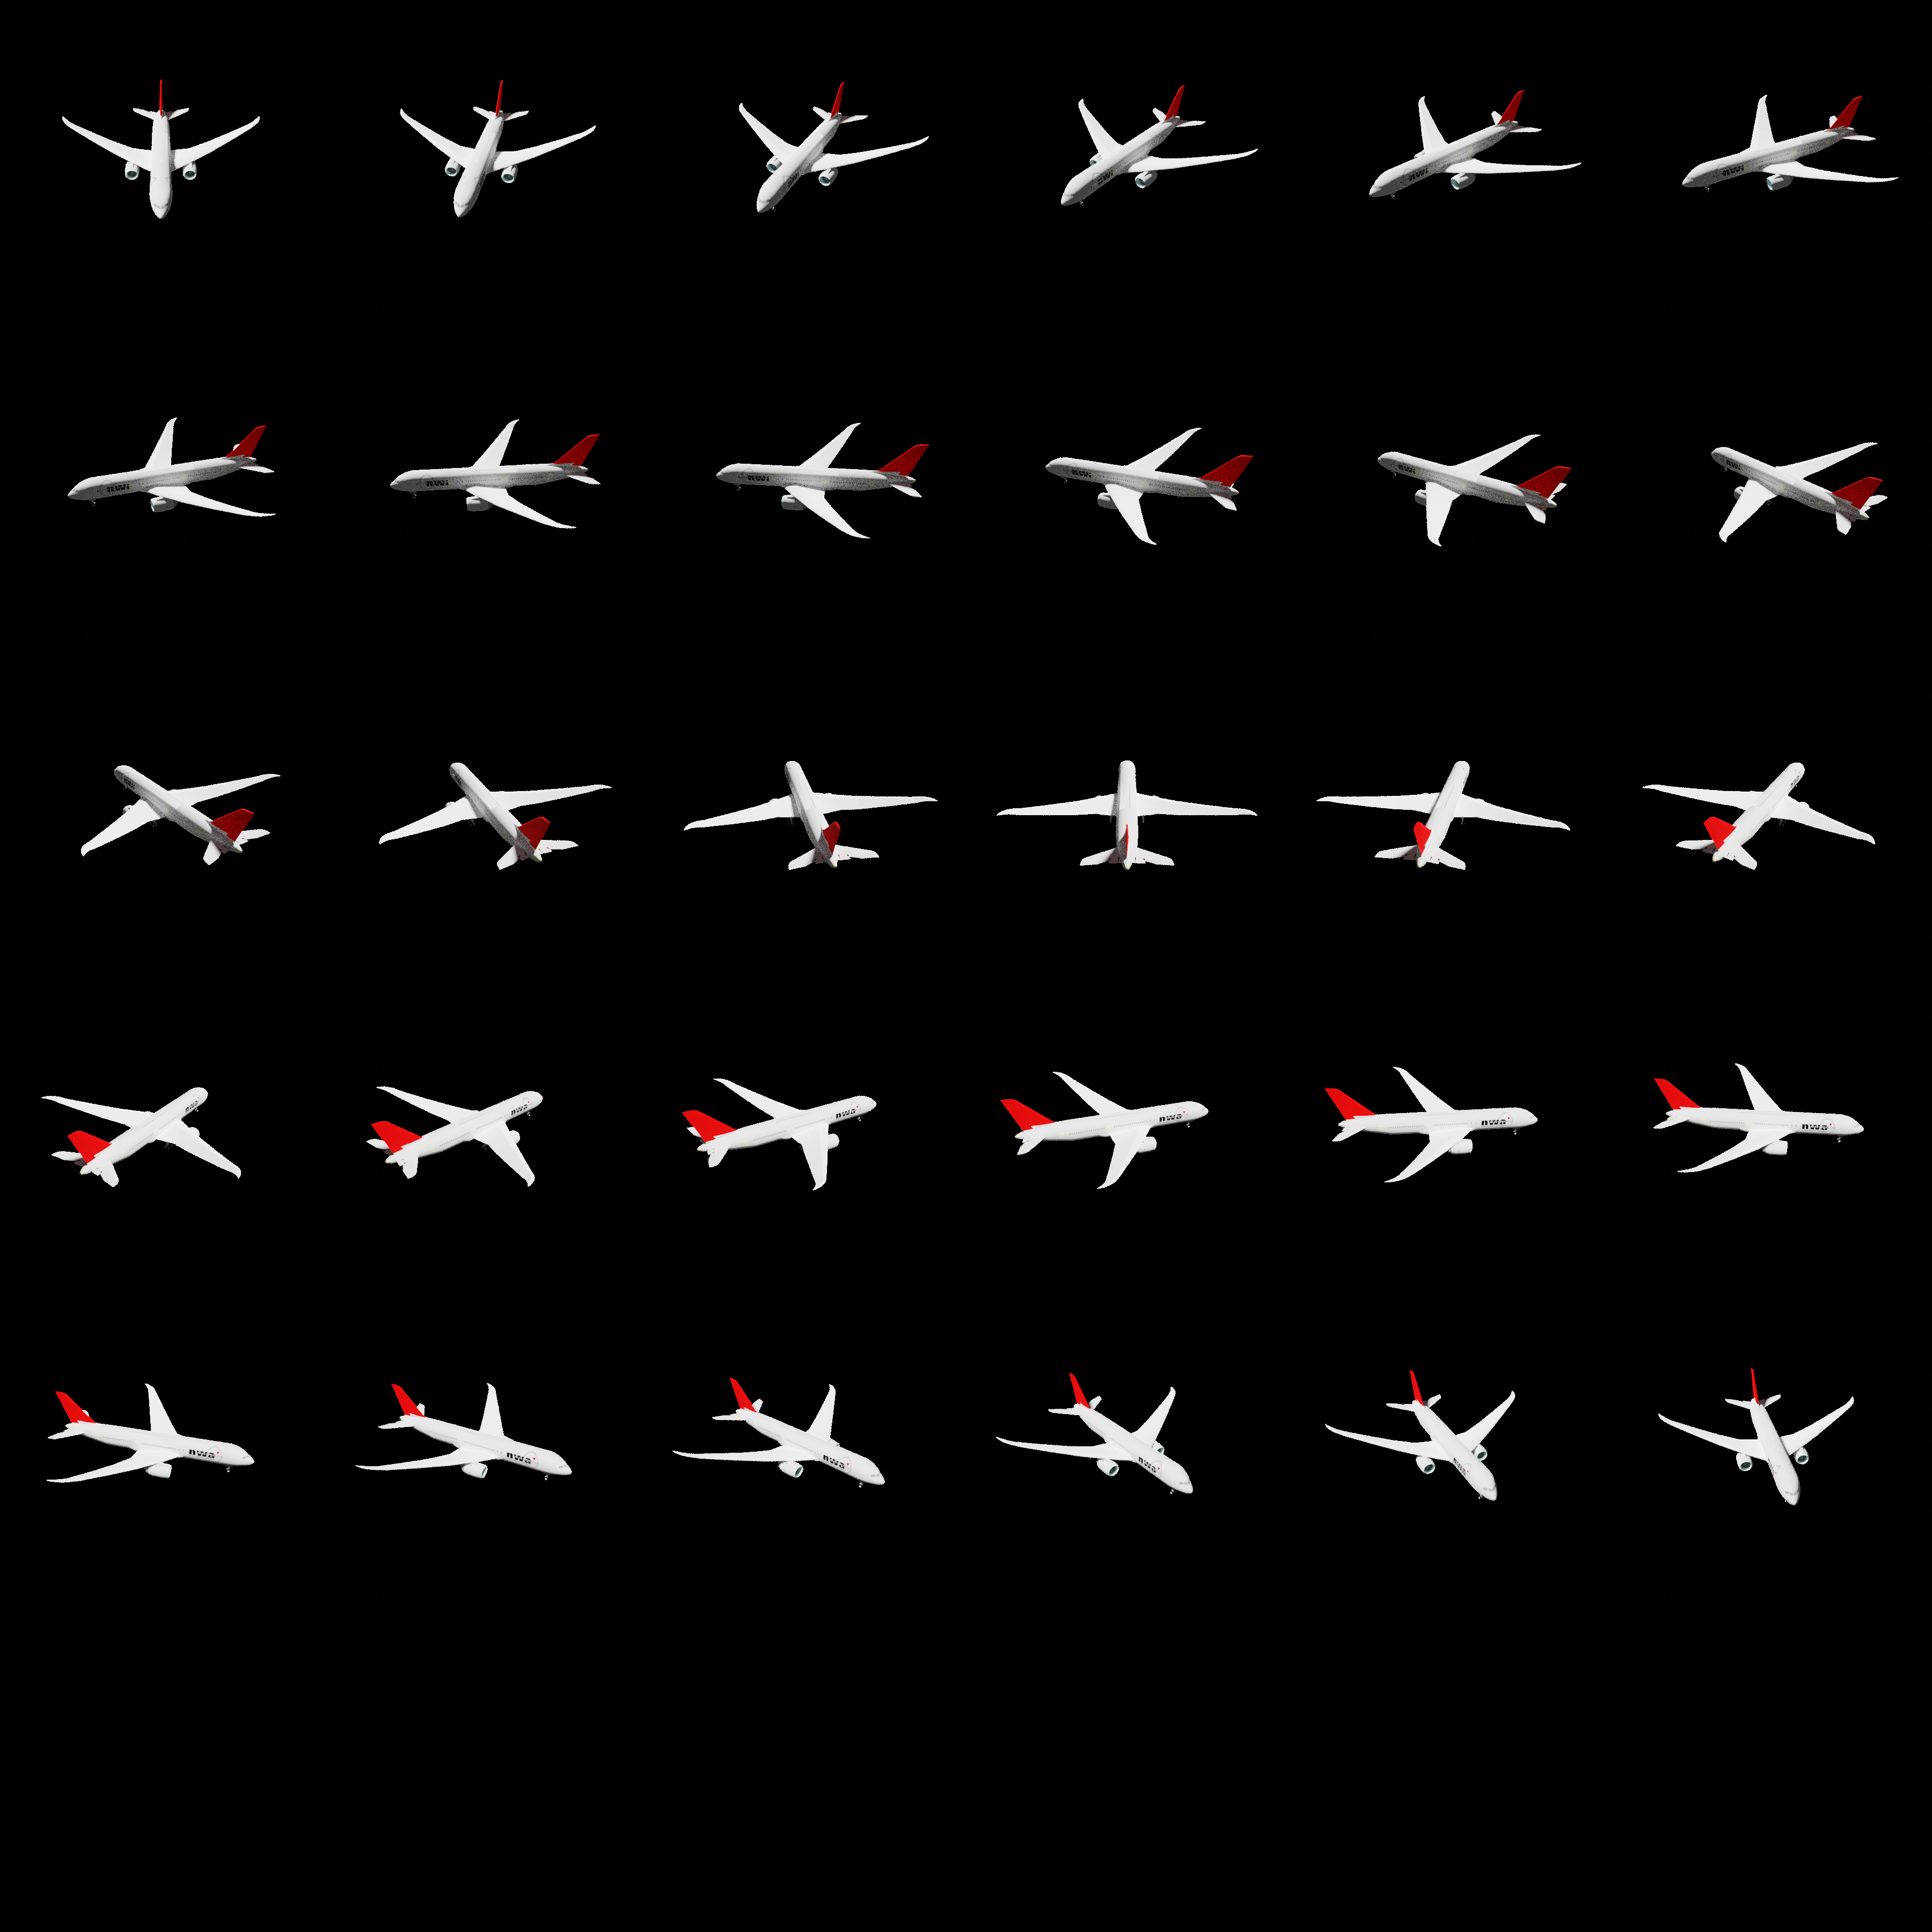

In [36]:
RGB_imgs_show

In [34]:
print(data)

{'pointcloud_np': array([[-0.00230638,  0.00803411,  0.37675699],
       [-0.00114646,  0.02224089,  0.36328958],
       [-0.00143394,  0.02356618,  0.35433427],
       ...,
       [ 0.00198185, -0.012269  , -0.00212572],
       [ 0.02099691, -0.012269  ,  0.06393918],
       [ 0.00989441, -0.012269  ,  0.02699776]]), 'angle_1': {'angle': 0, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x600 at 0x7F83543AFE10>, 'captions': ['a low-resolution photo of a plane in front of a grey background', 'an air craft is in 3D above the gray ground', 'a plane on a plane  gray background', 'an airplane is drawn and colored in gray', 'a jetliner flying over gray and white scenery', 'white airplane flying over a grey sky on a gray background', 'a picture of an airplane flying overhead', 'a gray, white airplane flying across the sky', 'there is a picture of a plane flying over the sky', 'the view of the plane from above is drawn']}, 'angle_2': {'angle': 12, 'image': <PIL.PngImagePlugi